Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go

Load data

In [85]:
Ticker = "ICICIBANK.NS"
start_date = "2010-01-01"
end_date = "2023-12-31"
download_data = yf.download(tickers= Ticker, start=start_date, end=end_date)
data = pd.DataFrame(download_data['Close'])
# data

[*********************100%%**********************]  1 of 1 completed


Draw 2 Standard Deviation plot

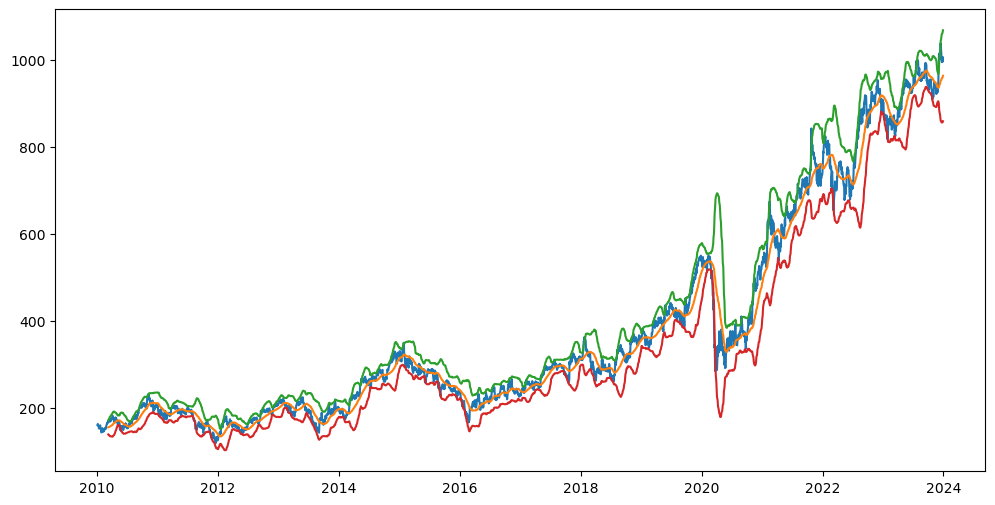

In [86]:
data['rolling_mean'] = data['Close'].rolling(45).mean()
data['rolling_std'] = data['Close'].rolling(45).std()
data['2UP'] = data['rolling_mean'] + 2.5*data['rolling_std']
data['2DOWN'] = data['rolling_mean'] - 2.5*data['rolling_std']
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.plot(data['rolling_mean'])
plt.plot(data['2UP'])
plt.plot(data['2DOWN']);

Weekly returns

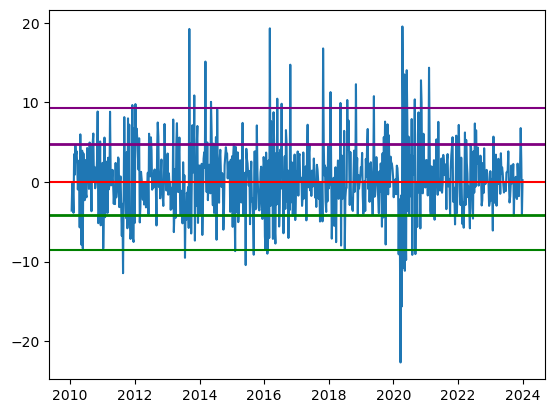

In [87]:
weekly_data = data['Close'].resample('W', label='left').ffill().pct_change()*100
plt.plot(weekly_data)
plt.axhline(0, color = 'red')
plt.axhline(np.mean(weekly_data) + np.std(weekly_data), color='purple', linewidth=2);
plt.axhline(np.mean(weekly_data) - np.std(weekly_data), color='green', linewidth=2);
plt.axhline(np.mean(weekly_data) + 2* np.std(weekly_data), color='purple');
plt.axhline(np.mean(weekly_data) - 2*np.std(weekly_data), color='green');

Linear Regression

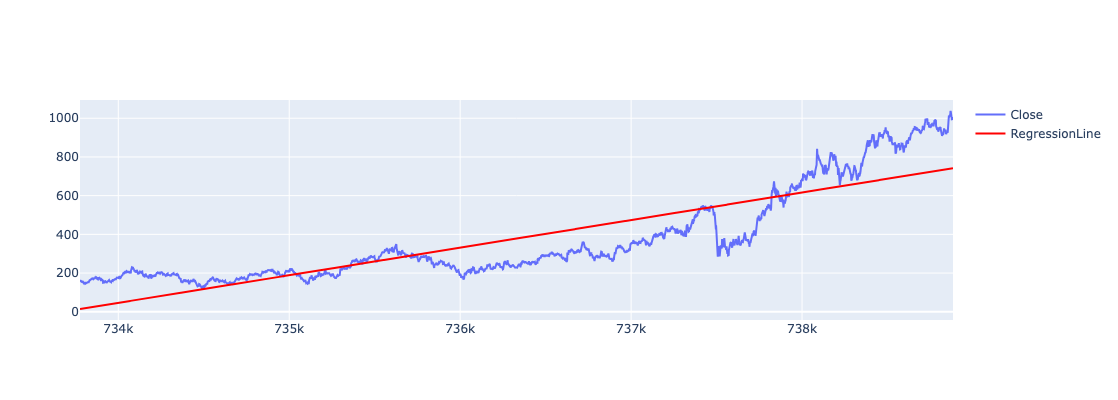

In [88]:
y = np.array(data['Close'])
X = pd.to_datetime(data['Close'].index).map(dt.datetime.toordinal)
X = np.array(X)
intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=X,y=y,mode = 'lines',name = 'Close'))
fig.add_trace(go.Scatter(x=X,y=slope*X+intercept, mode = 'lines',line=dict(color='Red'), name= "RegressionLine"))
fig.update_layout(autosize=True,width=1000,height=400)
fig

In [89]:
def return_seasonality(data):
    '''This return the monthly return of the ticker
    '''
    data = data['Close'].resample("M").ffill().pct_change()
    data = pd.DataFrame(data)
    data['date'] = data.index
    # print(data['date'])
    data['year'] = data.index.year
    
    new_df = pd.DataFrame()
    for value in data['year'].unique():
        # print(value)
        new_df[str(value)] = pd.Series(data[data['year']==value]['Close'].values)
        value+=1

        new_df = new_df.dropna()
    return new_df

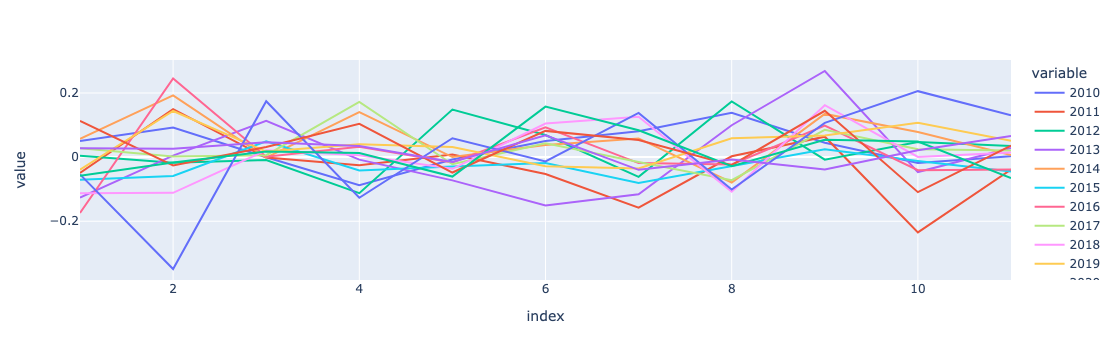

In [90]:
px.line(return_seasonality(data))